#Basic Visualization

There are a wealth of python libraries that make creating beautiful figures for print (in color and b/w) extremely easy. In this notebook, we'll cover a few of the most common applications of data visualization in system dynamics. 


In [2]:
%pylab inline
import pysd
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Ingredients

We'll use the Teacup model to demonstrate the various plotting functionality available to us with PySD.

In [3]:
model = pysd.read_vensim('../../models/Teacup/Teacup.mdl')

##Basic Plotting

The most straightforward way to plot the results of a PySD simulation is to use the plotting functionality built into the [pandas](http://pandas.pydata.org/) dataframe that PySD returns from a simulation run. For a detailed description of the options present in this package, see http://pandas.pydata.org/pandas-docs/stable/visualization.html

Pandas uses the standard [Matplotlib](http://matplotlib.org/) backend, so we can set the various plot parameters using the same syntax.

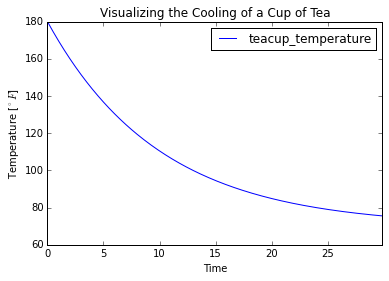

In [4]:
model.run().plot();
plt.xlabel('Time')
plt.ylabel('Temperature [$^\circ F$]')
plt.title('Visualizing the Cooling of a Cup of Tea');

If we want more control of our plots, we can unpack the dataframe by column:

In [12]:
result = model.run(return_columns=['teacup_temperature', 'heat_loss_to_room'])
x = result.index
y1 = result['heat_loss_to_room']
y2 = result['teacup_temperature']

We can then plot the data using matplotlib's standard plotting interface. You may recognize these plotting commands from Matlab, as matplotlib provides a parallel interface to make it easy to learn. See [the matplotlib documentation](http://matplotlib.org/1.4.3/api/pyplot_api.html#matplotlib.pyplot.plot) for further details.

To plot the two sets of timeseries data we just extracted on separate axes, we can use the following syntax. For more information about creating subplots in matplotlib see [this example](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) in the matplotlib documentation.

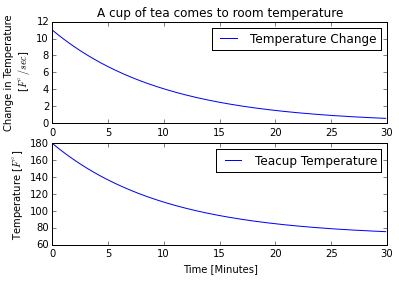

In [22]:
ax1 = plt.subplot(2,1,1)
ax1.plot(x, y1, label='Temperature Change')
plt.ylabel('Change in Temperature\n [$F^\circ/sec$]')
plt.legend()
plt.title('A cup of tea comes to room temperature')

ax2 = plt.subplot(2,1,2)
ax2.plot(x, y2, label='Teacup Temperature')
plt.ylabel('Temperature [$F^\circ$]')
plt.legend()
plt.xlabel('Time [Minutes]');

## Plotting a suite of runs

In some cases (such as sensitivity tests, or propagation of uncertainty) we want to plot many runs on the same chart, to get a sense for the variance in the model's simulation runs. This is fairly straightforward to accomplish by constructing a dataframe with one row for each run, and then plotting each row:

In [20]:
results = []
for i in range(1000):
    results.append(model.run(params={'characteristic_time':np.random.normal(15,3)})['teacup_temperature'])

resultsdf = pd.DataFrame(results)
resultsdf.head()

,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,1.125,...,28.75,28.875,29.0,29.125,29.25,29.375,29.5,29.625,29.75,29.875
teacup_temperature,180,178.958441,177.926743,176.904820,175.892568,174.889902,173.896730,172.912961,171.938508,170.973281,...,82.333262,82.216482,82.100807,81.986228,81.872734,81.760315,81.648960,81.538659,81.429403,81.321181
teacup_temperature,180,179.216183,178.437952,177.665269,176.898093,176.136381,175.380096,174.629201,173.883656,173.143423,...,91.236618,91.085295,90.935050,90.785875,90.637763,90.490707,90.344698,90.199730,90.055795,89.912886
teacup_temperature,180,178.960713,177.931243,176.911505,175.901398,174.900835,173.909725,172.927979,171.955509,170.992226,...,82.392535,82.275449,82.159470,82.044586,81.930788,81.818065,81.706407,81.595804,81.486247,81.377724
teacup_temperature,180,179.161579,178.329548,177.503864,176.684472,175.871323,175.064372,174.263572,173.468876,172.680236,...,88.929206,88.784927,88.641749,88.499661,88.358657,88.218727,88.079864,87.942060,87.805305,87.669593
teacup_temperature,180,179.338263,178.680508,178.026710,177.376848,176.730894,176.088825,175.450619,174.816251,174.185700,...,97.458424,97.293241,97.129051,96.965848,96.803628,96.642383,96.482108,96.322798,96.164446,96.007046


In our plot command, we can specify that the opacity of each line be set to 2 percent using the `alpha` pararameter. This gives us a visual sense of the distribution of the simulation runs.

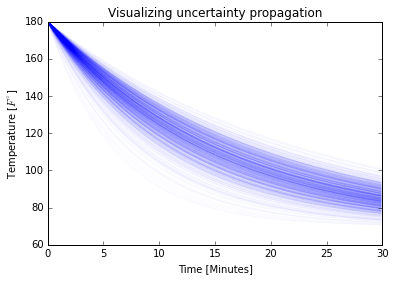

In [24]:
for i, row in resultsdf.iterrows():
    plt.plot(row.index, row.values, 'b', alpha=.02)
plt.title('Visualizing uncertainty propagation')
plt.ylabel('Temperature [$F^\circ$]')
plt.xlabel('Time [Minutes]');

##Add-on Packages

There are a number of packages which interact with matplotlib to make stylish plotting a little simpler. 

###Seaborn
One of these is [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/). To use it, we simply have to import it into the python environment and continue plotting as before. Seaborn provides a host of new functions and customizations that are illustrated [here](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html).

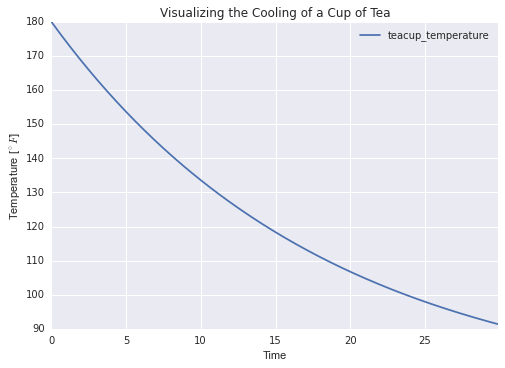

In [25]:
import seaborn
model.run().plot();
plt.xlabel('Time')
plt.ylabel('Temperature [$^\circ F$]')
plt.title('Visualizing the Cooling of a Cup of Tea');

### MPLD3

Another helpful package is [MPLD3](http://mpld3.github.io/), which constructs translates matplotlib (and thus matlab) plotting syntax into a [d3](http://d3js.org/)-rendered javascript object. Note that in the figure below, zoom and pan tools allow you to interact with the image.

Syntax here is very similar to before, with the addition of a call to the `display` function. For further examples see the [mpld3 gallery](http://mpld3.github.io/examples/index.html).

In [28]:
import mpld3
model.run().plot();
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Visualizing the Cooling of a Cup of Tea');
mpld3.display()